---
bibliography:
  - bibliography.bib
---

# Logistic Regression

### Logistic Regression Example 1.1
The approach results in a model for $P(default=Yes \,|\, balance )$ as depicted(blue line). The probability  

\begin{equation}
P( default=Yes | balance ) = p(Y = 1|X)
\end{equation}
is plotted against the monthly credit card bill (**balance**) $X$. The probabilities of the observed values are given by 
the $0/1$-Coding of the **default** variable: if **default=Yes** we have $p(X)=1$ (green dots) and in case **default=No** we have $p(X)=0$ (red dots).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df = pd.read_csv('Logistic Regression/data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model, only including the selection of no
i_ = np.concatenate((i_no, i_yes))
x = df.iloc[i_]['balance']
y = df.iloc[i_]['default_Yes']

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Find the predicted values
x_pred = x.sort_values()
y_pred = model.predict(sm.add_constant(x_pred))

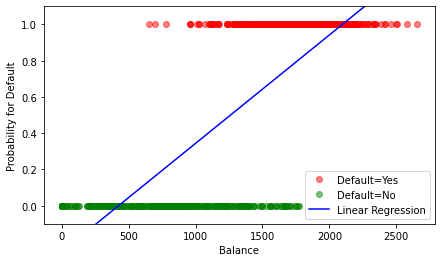

In [2]:
""" Plot """
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
# Plot datapoints
plt.plot(df.iloc[i_yes]['balance'], df.iloc[i_yes]['default_Yes'],
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df.iloc[i_no]['balance'], df.iloc[i_no]['default_Yes'], 
         'og', alpha=0.5, label='Default=No')
# Plot fit
plt.plot(x_pred, y_pred, 'b-', label='Linear Regression')
# Labels and limits
ax.set_xlabel('Balance')
ax.set_ylabel('Probability for Default')
ax.set_ylim(-0.1, 1.1)
plt.legend()

plt.show()               

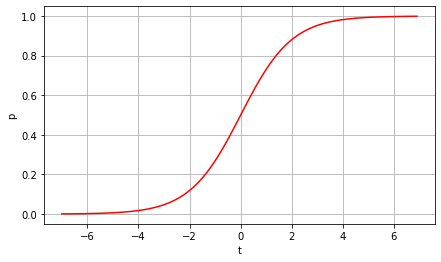

In [3]:
# Define t and p
t = np.arange(-7, 7, 0.1)
p = []
for i in range(len(t)):
    p.append(np.exp(t[i]) / (1 + np.exp(t[i])))

# Plot graph
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
plt.plot(t, p, 'r-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('p')
plt.show()

Note that the linear function of the model returns negative values for low **balance** and values greater than $1$ for high **balance**. These values are not interpretable as probabilities, since those are bounded between $0$ and $1$. 

Also note that only a part of the **data** was included. The full data contains many more **default = No** entries, which would result in a much lower probability for default. 


### Logistic Regression Example 1.2
A simple logistic regression model for the **Default** data is plotted. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df = pd.read_csv('Logistic Regression/data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model, only including the selection of no
i_ = np.concatenate((i_no, i_yes))
x = df.iloc[i_]['balance']
y = df.iloc[i_]['default_Yes']

x_sm = sm.add_constant(x)

model = sm.GLM(y, x_sm, family=sm.families.Binomial())
model = model.fit()

# Find the predicted values
x_pred = x.sort_values()
y_pred = model.predict(sm.add_constant(x_pred))

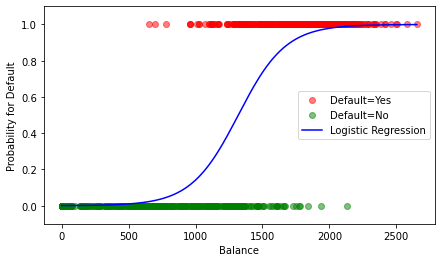

In [2]:
""" Plot """
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
# Plot datapoints
plt.plot(df.iloc[i_yes]['balance'], df.iloc[i_yes]['default_Yes'],
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df.iloc[i_no]['balance'], df.iloc[i_no]['default_Yes'], 
         'og', alpha=0.5, label='Default=No')
# Plot fit
plt.plot(x_pred, y_pred, 'b-', label='Logistic Regression')
# Labels and limits
ax.set_xlabel('Balance')
ax.set_ylabel('Probability for Default')
ax.set_ylim(-0.1, 1.1)
plt.legend()
plt.show()               

For small values of **balance** the predicted values for $p(X)$ 
tend to $0$. Likewise, the predictions tend to $1$ for large 
**balance** values. All values of the model are within the 
interval $[0,1]$ and thus interpretable as probabilities. 

### Extra info: 
The graph would look rather different if the complete data would be included:

In [3]:
# Fit logistic model, using all no
x = df['balance']
y = df['default_Yes']

x_sm = sm.add_constant(x)

model = sm.GLM(y, x_sm, family=sm.families.Binomial())
model = model.fit()

# Find the predicted values
x_pred = x.sort_values()
y_pred = model.predict(sm.add_constant(x_pred))

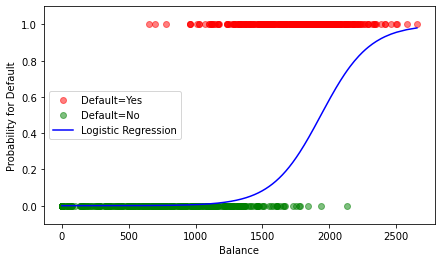

In [4]:
""" Plot """
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
# Plot datapoints
plt.plot(df.iloc[i_yes]['balance'], df.iloc[i_yes]['default_Yes'],
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df.iloc[i_no]['balance'], df.iloc[i_no]['default_Yes'], 
         'og', alpha=0.5, label='Default=No')
# Plot fit
plt.plot(x_pred, y_pred, 'b-', label='Logistic Regression')
# Labels and limits
ax.set_xlabel('Balance')
ax.set_ylabel('Probability for Default')
ax.set_ylim(-0.1, 1.1)
plt.legend()
plt.show()                              

### Logistic Regression Example 2.2
The **Python**-output below shows the estimates for the parameters in the logistic regression model. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Logistic Regression/data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Fit logistic model
x = df['balance']
y = df['default_Yes']

x_sm = sm.add_constant(x)

model = sm.GLM(y, x_sm, family=sm.families.Binomial())
model = model.fit()

# Print summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Tue, 21 Mar 2023   Deviance:                       1596.5
Time:                        09:01:21   Pearson chi2:                 7.15e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.0

In [2]:
# Find confidence interval
print(model.conf_int(alpha=0.05))

                 0         1
const   -11.359208 -9.943453
balance   0.005067  0.005931


The two-sided $95\%$-interval for $\beta_1$ is well seperated from 
$0$ which is equivalent to rejecting $\text{H}_0$ with a type I error of $\alpha = 5\%$. 


### Logistic Regression Example 3.1
The estimated coefficients are
$\hat{\beta}_{0} = -10.6513$ 

$\hat{\beta}_{1} = 0.0055$

Thus, if an individual has **balance = 1000**, then the model yields
\begin{equation}
\hat{p}(1000)
=\dfrac{e^{-10.65+ 0.0055\cdot 1000}}{1+e^{-10.65+ 0.0055\cdot 1000}}
\approx 0.00577
\end{equation}

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Logistic Regression/data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Fit logistic model
x = df['balance']
y = df['default_Yes']

x_sm = sm.add_constant(x)

model = sm.GLM(y, x_sm, family=sm.families.Binomial())
model = model.fit()

# Predict for balance = 1000
x_pred = [1, 1000]
y_pred = model.predict(x_pred)

print(y_pred)

[0.00575215]


This probability of default is well below $1\%$, which is very low. However, a different individual with **balance = 2000** has a default probability
of approximately $59\%$.

In [4]:
# Predict for balance = 2000
x_pred = [1, 2000]
y_pred = model.predict(x_pred)

print(y_pred)

[0.58576937]


### Logistic Regression Example 3.2
For the **Default** data the following **Python**-code computes the training classification error. 

In [7]:
""" Follows Example 3.1 """
# Predict for training data
x_pred = x_sm
y_pred = model.predict(x_pred)
print(y_pred[10])

# Round to 0 or 1
y_pred = y_pred.round()
print(y_pred[10])

# Compute training error
e_train = abs(y - y_pred)
e_train = e_train.mean()

print(e_train)

2.3668765516963852e-05
0.0
0.0275


The value of the training error in this example is 0.0275, which is to say that approximately 97.25%  of the cases in the training set are classified correctly. 

### Logistic Regression Example 3.3
The following **Python**-code produces the confusion matrix for the **Default** data set and the logistic regression model.

In [8]:
""" Follows Example 3.2 """
# Create confusion matrix
confusion = pd.DataFrame({'predicted': y_pred,
                          'true': y})
confusion = pd.crosstab(confusion.predicted, confusion.true, 
                        margins=True, margins_name="Sum")

print(confusion)

true          0    1    Sum
predicted                  
0.0        9625  233   9858
1.0          42  100    142
Sum        9667  333  10000


It can be seen that out of $9667$ cases with **default=No**, the vast majority of $9625$ are classified correctly. On the other hand, only approximately $1/3$
of the **default=Yes** cases are classified correctly. The confusion matrix shows that the present classification scheme is by no means useful, in particular,
if you want to predict the case of **default=Yes**.

The reason for this bad result is the *imbalance* of the two classes. The training data only contains $333$ out of $ 10000$ cases with **default=Yes**.
Therefore, the likelihood function is dominated by the factors corresponding to **default=No**, so the parameters are chosen as to match mainly those 
cases. Note also that the trivial classifier predicting all observations $x$ to $\hat{f}(x)=0$ has a classification error of $333/10000=0.0333$ which 
is not much worse than that of our logistic model.

The situation can also be visualized by the histograms of the estimated probabilities of **default=Yes** separated by true class.

It is striking that the **default=No** group has a high concentration of probabilities near $0$ which is reasonable for this group. On the other hand, though,
the estimated probabilities for the **default=Yes** cases do not exhibit high mass at $1$. Instead, the maximal probability is attained close to $0$ as well!

### Logistic Regression Example 3.8
We can compute the F1 score by means of the

In [9]:
""" Follows Example 3.3 """
from sklearn.metrics import f1_score

# Find F1-score
f1 = f1_score(y, y_pred, pos_label=1, average='binary')
print(f1)


0.42105263157894746


**pos\_label**  is an optional character string for the factor level that corresponds to a *positive* result.

### Logistic Regression Example 3.9
If we consider the case **default=No** as positive, then the F1 score changes to

In [6]:
""" Follows Example 3.8 """
# Find F1-score
f1 = f1_score(y, y_pred, pos_label=0, average='binary')
print(f1)


0.9859154929577464


### Logistic Regression Example 3.10
We analyze the **Default** data set and fit a logistic regression model by downsampling the **default=No** class to the same size as the **default=yes** case. 

In [10]:
""" Follows Example 3.9 """
# Set ramdom seed
np.random.seed(1)
# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model on downsampled data
i_ds = np.concatenate((i_no, i_yes))
x_ds = df.iloc[i_ds]['balance']
y_ds = df.iloc[i_ds]['default_Yes']

x_sm = sm.add_constant(x_ds)

model_ds = sm.GLM(y_ds, x_sm, family=sm.families.Binomial())
model_ds = model_ds.fit()

# Predict for downsampled data
x_pred_ds = x_sm
y_pred_ds = model_ds.predict(x_pred_ds)

# Round to 0 or 1
y_pred_ds = y_pred_ds.round()

# Classification error on training data:
e_train = abs(y_ds- y_pred_ds)
e_train = e_train.mean()

print(np.round(e_train, 4))

0.1171


In [11]:
# Create confusion matrix
confusion = pd.DataFrame({'predicted': y_pred_ds,
                          'true': y_ds})
confusion = pd.crosstab(confusion.predicted, confusion.true, 
                        margins=True, margins_name="Sum")

print(confusion)

true         0    1  Sum
predicted               
0.0        293   38  331
1.0         40  295  335
Sum        333  333  666


In [12]:
# Print F1-scores
f1_pos = f1_score(y_ds, y_pred_ds, pos_label=1, average='binary')
f1_neg = f1_score(y_ds, y_pred_ds, pos_label=0, average='binary')

print('\nF1-Score (positive = default) = \n', f1_pos,
      '\nF1-Score (positive = not-default) = \n', f1_neg)


F1-Score (positive = default) = 
 0.8832335329341318 
F1-Score (positive = not-default) = 
 0.8825301204819278


On the downsampled training set, the confusion matrix is balanced, and the classification error is 0.1171, which amounts to 88.29% correctly classified samples. As we observe now, the F1 score for **default=Yes** as positive case has now considerably improved.

Furthermore, the histograms of the predicted probabilities have a complete different shape than before. The separation of the two classes becomes clearly visible.

### Logistic Regression Example 4.1
In order to use the cross validation, we need to use sklearn instead of statsmodels.

The logistic model for the **Default** data set will now be evaluated with $k$-fold cross validation. We use the **cross\_val\_score()**-function from **sklearn.model\_selection** for computing the estimated error. We choose $k = 5$ and use the downsampled version of the training data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load data
df = pd.read_csv('Logistic Regression/data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Set ramdom seed
np.random.seed(1)
# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model on downsampled data
i_ds = np.concatenate((i_no, i_yes))
x_ds = df.iloc[i_ds][['balance']]
y_ds = df.iloc[i_ds]['default_Yes']

model = LogisticRegression()

# Calculate cross validation scores:
scores = cross_val_score(model, x_ds, y_ds, cv=5)
print(scores)
print(np.mean(scores))

[0.93283582 0.84962406 0.85714286 0.90225564 0.87218045]
0.8828077656828638


### Logistic Regression Example 5.1

We fit a multiple logistic regression model to the **Default** data set using **balance**, **income**, and **student** as predictor variables. Note that the latter is a *qualitative* predictor with levels **Yes** and **No**. In order to use it in the regession model, we define a *dummy variable* with value $1$ if **student=Yes** and $0$ if **student=No**.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Logistic Regression/data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df[['default', 'student']], 
                            prefix={'default': 'default', 
                                    'student': 'student'},
                            drop_first=True))
# Set ramdom seed
np.random.seed(1)
# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model on downsampled data
i_ds = np.concatenate((i_no, i_yes))
x_ds = df.iloc[i_ds][['balance', 'income', 'student_Yes']]
y_ds = df.iloc[i_ds]['default_Yes']

# Model using statsmodels.api
x_sm = sm.add_constant(x_ds)
model_sm = sm.GLM(y_ds, x_sm, family=sm.families.Binomial())
model_sm = model_sm.fit()

print(model_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            default_Yes   No. Observations:                  666
Model:                            GLM   Df Residuals:                      662
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -186.21
Date:                Wed, 18 Oct 2023   Deviance:                       372.42
Time:                        13:09:22   Pearson chi2:                     571.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.1303      0.869     -8.205      

In [3]:
# Predict training data
x_pred = x_sm
y_pred = model_sm.predict(x_pred)

# Round to 0 or 1
y_pred = y_pred.round()

# Create confusion matrix
confusion = pd.DataFrame({'predicted': y_pred,
                          'true': y_ds})
confusion = pd.crosstab(confusion.predicted, confusion.true, 
                        margins=True, margins_name="Sum")

print(confusion)

true         0    1  Sum
predicted               
0.0        293   36  329
1.0         40  297  337
Sum        333  333  666


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Model using sklearn
model_sk = LogisticRegression(solver='liblinear', penalty='l1')

# Calculate cross validation scores:
scores = cross_val_score(model_sk, x_ds, y_ds, cv=5)
print(np.mean(scores))

0.8827965435978005


First we find that the predictors **balance** and **student** are significant, i.e. they contribute substantially to the model for **default**. The coefficient of **student** is negative, i.e. the student status means a *decrease* in probability for default for a fixed value of **balance** and **income**.

Further we find a cross-validated score of 0.8828, which amounts to say that the model classifies correctly 88.28% of the cases. This is not much an increase compared with the single logistic regression model. Also the confusion matrix is very similar to the simple regression case. 

We will now use the coefficients above in order to predict the probability for default for new observations. For example, if a student has a credit card bill of CHF 1500 and an income of CHF 40000, so the estimated probability for **default** is
\begin{equation}
\hat{p}(1500,40,1)
=\dfrac{e^{-6.679+0.00529\cdot 1500 -0.0043\cdot 40-0.6468\cdot 1}}{1+e^{-6.679+0.00529\cdot 1500-0.0043\cdot 40-0.6468\cdot 1}}
=0.564
\end{equation}

For a non-student with the same balance and income the estimated probability for default is
\begin{equation}
\hat{p}(1500,40,0)
=\dfrac{e^{-6.679+0.00529\cdot 1500-0.0043\cdot 40-0.6468\cdot 0}}{1+e^{-6.679+0.00529\cdot 1500-0.0043\cdot 40-0.6468\cdot 0}}
=0.747
\end{equation}
The coefficient for **income** is multiplied by $1000$ for lucidity. Thus we insert $40$ instead of $40000$ into the model. 
